# Lab. 3- Report

# Algorithms

In an attempt to modularize the code, we start by coding and briefly explaining the funtions which will be used in the exercises.

First we define the functions that perform the gradient descent with bactracking for the step. At each iteration
$k$ an initial value of $\alpha = 1$ is tested. As for the stopping condition, we impose that the algorithm continues until 
the modulus of the gradient is larger than $10^{-5}$ AND $\alpha >10^{-5}$. 
The first condition is one of the possible choices in this case, since we know that the gradient evaluated at a minimum is zero. 
The second condition is equivalent, because reaching a very small value of  $\alpha$ means that there is no neighboring point in which the function takes a smaller value (i. e. we are in a local minimum). 

Both conditions may be used on their own. However, in the following it will be clear that the sole condition on the gradient is not enough, therefore also here we use both to be on the safe side.

In [6]:
def descent(XX,YY):
  
    plt.figure(figsize=(10,10)) 
    listX=[XX]
    listY=[YY]

    XX2=0
    YY2=0 
    plt.plot (XX,YY,"ro", color="black")


    a=1
    i=0
    j=0


    while (math.sqrt((dx(XX,YY))**2+(dy(XX,YY))**2)>0.00001 and a>0.00001): #two stopping conditions
        j=j+1
        XX2=XX-a*dx(XX,YY)
        YY2=YY-a*dy(XX,YY)



        if func(XX2,YY2)>=func(XX,YY):
            a=a/2.0
        else:       
            XX=XX2
            YY=YY2
            i=i+1
            a=1.0
            plt.plot (XX,YY,"ro")
        listX.append(XX)
        listY.append(YY)

    plt.plot(listX,listY, "k")  
    plt.title("Path with gradient descent, with backtracking on the step. The initial point is in black. ")
    plt.streamplot(X, Y, dx(X,Y), dy(X,Y))
    plt.contour(X,Y,Z,100)

    plt.show()
    print "The coordinate of the reached point are (",XX,";",YY,")."
    print "Steps done:",i
    print "Attempts:",j
    


Below, we define the function that performs (or tries to) Newton method, with backtracking on the step.
We still use an iterative algorithm whose general form is 
$$x^{k+1}=x^k +\alpha^kd^k.$$ 
While in the gradient descent implemented above we choose the gradient as the descent direction, here this is given by the soluton of the system :
$$ \nabla^2f(x^k) = - \nabla f(x^k).$$
This direction is not necessarily a descent direction in points where the Hessian is not positive definite. If we do not take it into account, using Newton's method will fail or, worse, will enter an infinite loop. (see example below).

In [7]:
def Newton(XX,YY): 
    #Newton's method and backtracking    
    plt.figure(figsize=(10,10)) 
    listX=[XX]
    listY=[YY]

 

    XX2=0
    YY2=0 
    plt.plot (XX,YY,"ro", color="black")


    a=1
    i=0
    j=0


    while (math.sqrt((dx(XX,YY))**2+(dy(XX,YY))**2)>0.00001 and a>0.00001): #two stopping conditions
        H=np.matrix([[seconddx(XX,YY), dxdy(XX,YY)], [dxdy(XX,YY), seconddy(XX,YY)]])  
        grad=((dx(XX,YY),dy(XX,YY)))
        direc=-numpy.linalg.solve(H,grad)

        XX2=XX+a*direc[0]
        YY2=YY+a*direc[1]
        j=j+1 #j counts the number of attempts

        if func(XX2,YY2)>=func(XX,YY):
            a=a/2.0


        else:       

            XX=XX2
            YY=YY2
            i=i+1 #i counts the actual number of steps performed to reach the minimum
            a=1.0
            plt.plot (XX,YY,"ro", color="green")
            listX.append(XX)
            listY.append(YY)

    plt.plot(listX,listY, "k")  
    plt.title("Path with the sole Newton method, with backtracking on the step. The initial point is in black. ")
    plt.streamplot(X, Y, dx(X,Y), dy(X,Y))
    plt.contour(X,Y,Z,100)

    plt.show()
    print "The coordinate of the reached point are (",XX,";",YY,")."
    print "Steps done:",i
    print "Attempts:",j
    


 The following function is a simple way to take care of the fact that Newton's method can get stuck when it steps on a point at which the Hessian is not positive definite. At each iteration, we first verify whether or not the Hessian matrix is positive definite. If this is the case, we perform a step according the descent direction found by Newton's method. Otherwise, we select the gradient as a "fall-back" descent direction.

In [1]:
def Newtonupgrad(XX,YY):
    #Newton's method AND gradient descent 
    
    listX=[XX]
    listY=[YY]
    plt.figure(figsize=(10,10)) 
    XX2=0
    YY2=0 
    plt.plot (XX,YY,"ro",color='black')


    a=1
    ib=0
    inew=0
    jb=0
    jnew=0
    iactual=0


    while (math.sqrt((dx(XX,YY))**2+(dy(XX,YY))**2)>0.00001 and a>0.00001):    
        H=np.matrix([[seconddx(XX,YY), dxdy(XX,YY)], [dxdy(XX,YY),seconddy(XX,YY)]]) 

        w=numpy.linalg.eigvals(H)
        jnew=jnew+1 #counts the number of Newton attempts

        if (w[0]*w[1]>0 and H[0,0]>0): #if the matrix is positive definite use  Newton's method

            grad=((dx(XX,YY),dy(XX,YY)))
            direc=-numpy.linalg.solve(H,grad)
            XX2=XX+a*direc[0]
            YY2=YY+a*direc[1]

            #backtracking for Newton's method
            if func(XX2,YY2)>=func(XX,YY):
                a=a/2.0       
            else:             
                XX=XX2
                YY=YY2
                inew=inew+1 #counts the actual number of Newton steps
                a=1.0
                plt.plot (XX,YY,"ro",color='green')


        else: #otherwise use the gradient descent
            #print "Newton attempt failed"
            jb=jb+1 #count the number of attempts with gradient descent
            XX2=XX-a*dx(XX,YY)
            YY2=YY-a*dy(XX,YY)

            #backtracking for Gradient descent
            if func(XX2,YY2)>=func(XX,YY):
                a=a/2.0
            else:       
                XX=XX2
                YY=YY2
                ib=ib+1 #count the number of steps by gradient descent
                a=1.0
                plt.plot (XX,YY,"ro", color="red")
        listX.append(XX)
        listY.append(YY)
 


    plt.plot(listX,listY, "k")    
    plt.title("Path with Newton's method and gradient descent, according to the properties of the Hessian Matrix. Both methods with backtracking on the step. Initial point in black ")
    plt.streamplot(X, Y, dx(X,Y), dy(X,Y))
    plt.contour(X,Y,Z,100)

    plt.show()

    print "Steps done following gradient descent:",ib
    print "Attempts done by the  gradient descent method:",jb
    print "Steps done following Newton's method:",inew
    print "Attempts done by Newton's method:",jnew
    


# Exercise 2


# 2.1
Here we reconsider the function of Lab1. We minimize it by using the gradient descent method with backtracking. First we set it up and plot it.

Populating the interactive namespace from numpy and matplotlib


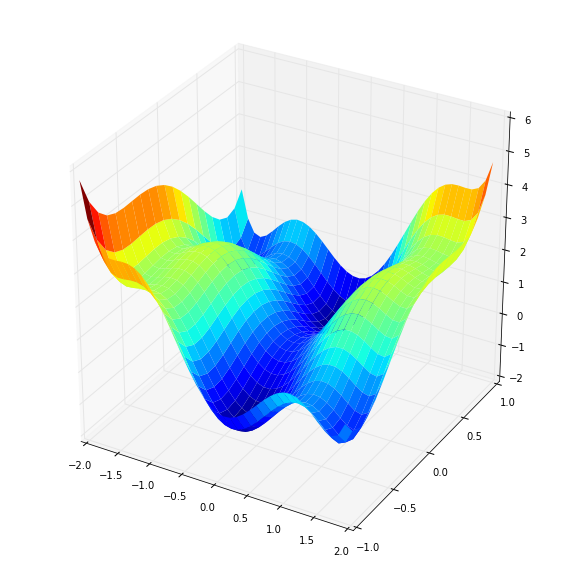

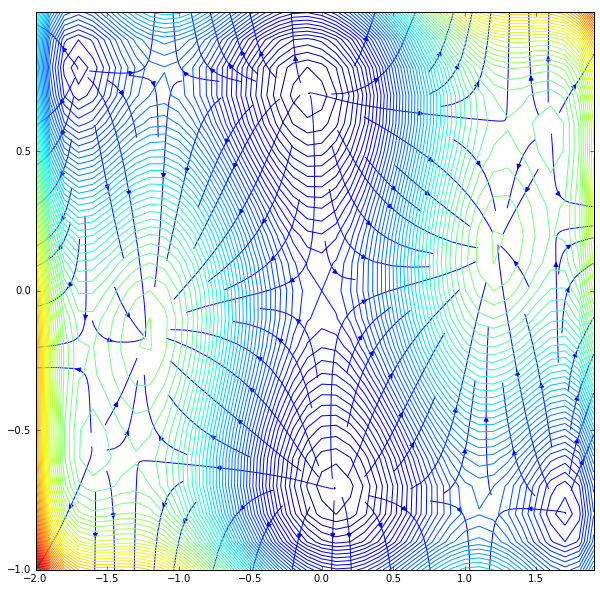

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import math
# Surface to plot
X = np.arange(-2, 2, 0.1)
Y = np.arange(-1, 1.1, 0.1)
X, Y = np.meshgrid(X, Y)

########Functions returning the function and the necessary derivatives################

#Define a function returning the value of f evaluated at the argument
def func(X,Y):
    return  (X**2)*(4-2.1*X**2+(1./3.)*X**4)+ X*Y+ (Y**2)*(-4+4*Y**2)


#Define two functions that calculate the two first partial derivatives
def dx(X,Y): 
    return 8*X-4*2.1*X**3+2*X**5+Y 


def dy(X,Y):
    return X-8*Y+16*Y**3

#define a function that gives the off-diagonal terms of the Hessian Matrix (they are equal, Schwar'z theorem)
def dxdy(X,Y):
    return 1

#Define two functions that calculate the pure second derivative with respect to x
def seconddx(x,y): 
    return 10*x**4-25.2*x**2+8

#calculate the pure second der with respect to y
def seconddy(x,y):
    return 48*y**2-8

###########################################

f_l1 = X**2
f_l2 = 4-2.1*X**2+(1./3.)*X**4
f_m =X*Y

f_r1 = Y**2
f_r2 = -4+4*Y**2



Z = np.multiply(f_l1, f_l2)+f_m+np.multiply(f_r1,f_r2) #evalute the function at each point of the grid

%pylab inline

# Surface plot 3D 
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,  cmap=cm.jet,
                linewidth=0, antialiased=True)


plt.show()

plt.figure(figsize=(10,10))
plt.streamplot(X, Y, dx(X,Y), dy(X,Y))
plt.contour(X,Y,Z,100)

Now we seek a minimum with the two methods; the initial point is plotted in back.

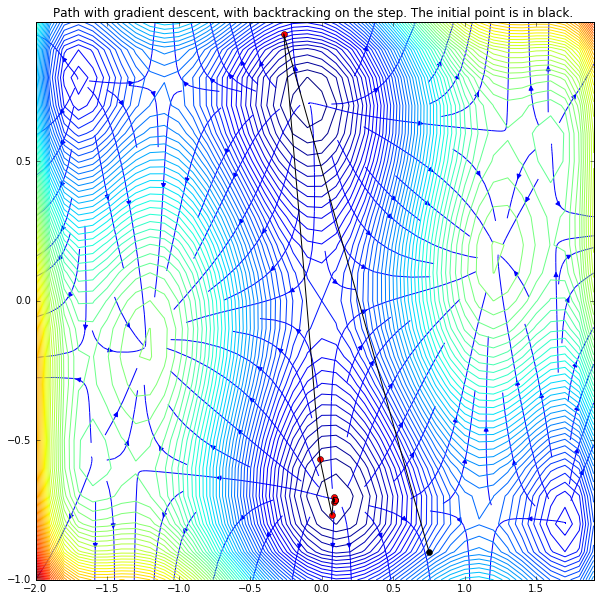

The coordinate of the reached point are ( 0.0898419861353 ; -0.712655962698 ).
Steps done: 10
Attempts: 41


In [10]:
descent(0.75,-0.9)

The method is a bit erratic ... but in the end it reaches a minimum in 10  steps and 41 attempts


# 2.2

Now we use Newton's method.

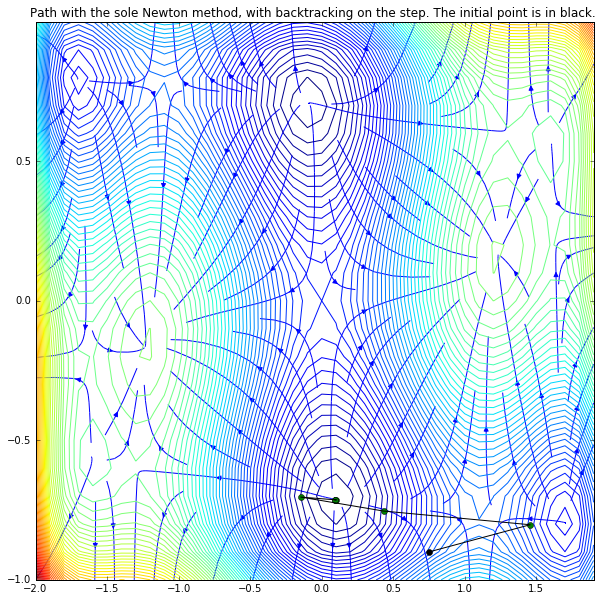

The coordinate of the reached point are ( 0.0898420123341 ; -0.712656402976 ).
Steps done: 6
Attempts: 8


In [11]:
Newton (0.75,-0.9)

Newton's method performs better, only 6 steps instead of 11 and is less erratic. Howeve, let us try other starting points.

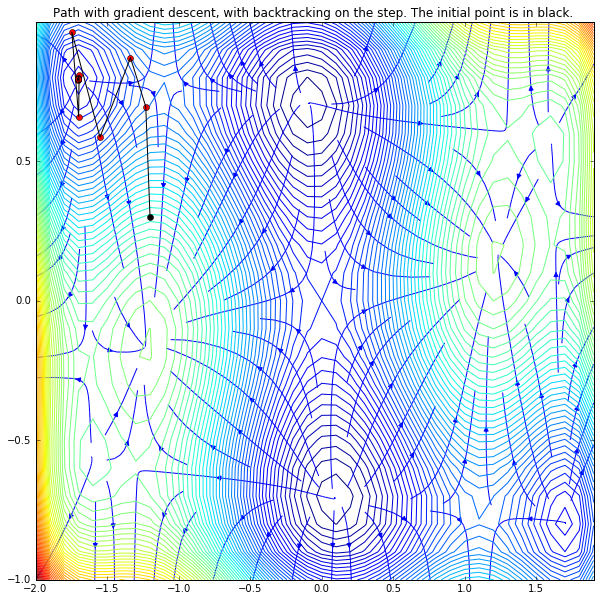

The coordinate of the reached point are ( -1.70360660126 ; 0.796083978319 ).
Steps done: 18
Attempts: 86


In [12]:
descent(-1.2,0.3)

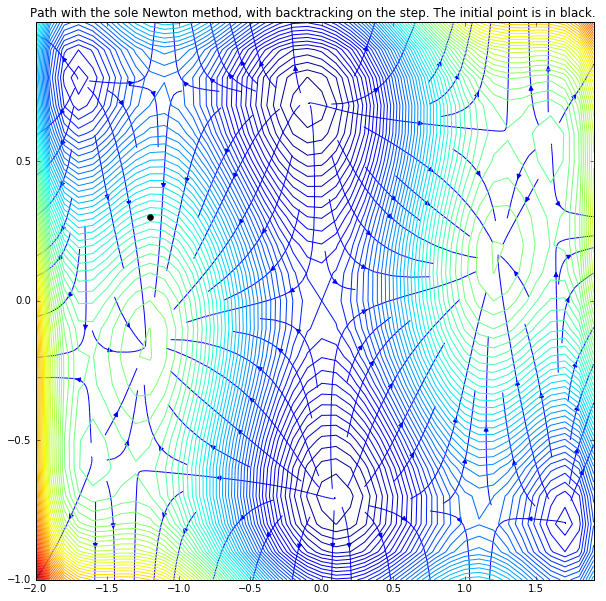

The coordinate of the reached point are ( -1.2 ; 0.3 ).
Steps done: 0
Attempts: 17


In [13]:
Newton(-1.2,0.3)

Newton method fails. What happens is that the method gets stuck in the starting point, since the Newton direction is not a descent direction. No matter how small $\alpha$ is, the function will always increase if we perform a step by taking this direction. Therefore, the method stops when the condition on $\alpha$ is no longer satisfied : after that, the step is halved many times in at attempt to perform an advantageous step, but it is impossible.

Notice that without the stopping condition on  $\alpha$ we would enter an infinite loop.

# 2.3

As said above, there are different ways to tackle this problem. Now we use the simple solution implemented in the function Newtonupgrad. If Newton method gets stuck, the gradient is taken as a descent direction

[[-7.552  1.   ]
 [ 1.    -3.68 ]]


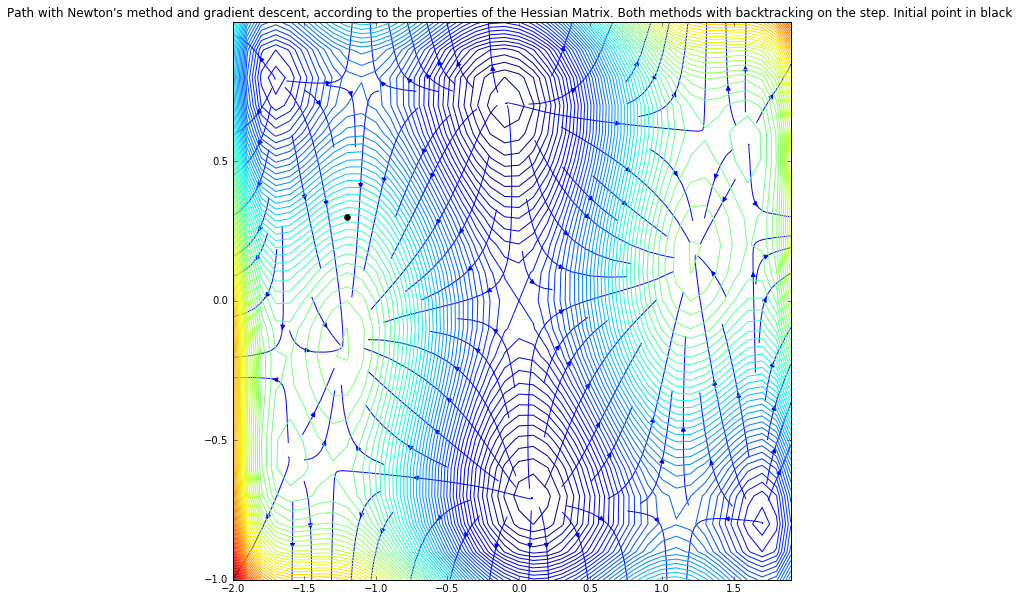

Steps done following gradient descent: 0
Attempts done by the  gradient descent method: 1
Steps done following Newton's method: 0
Attempts done by Newton's method: 1


In [14]:
Newtonupgrad(-1.2,0.3)

Only 7 steps and 29 attempts, much fewer than the pure gradient descent. Red dots correspond to a "gradient-descent step", while green to a Newton step. We see that, close to the minimum,  Newton's method works very well. Indeed, after the first three steps, it is always  Newton's method which is used and it converges to the minimum very rapidly. Conversely, close to the minimimum the gradient descent lingers, since the gradient approaches zero. 

# Exercise 3

We now consider Rosenbrok function 
$$ f(x,y)=(a-x)^2 + b(y-x^2)^2,$$
with the common choice of the coefficient $a=1$ and  $b=100$. First, we plot the function and its contour.

Populating the interactive namespace from numpy and matplotlib


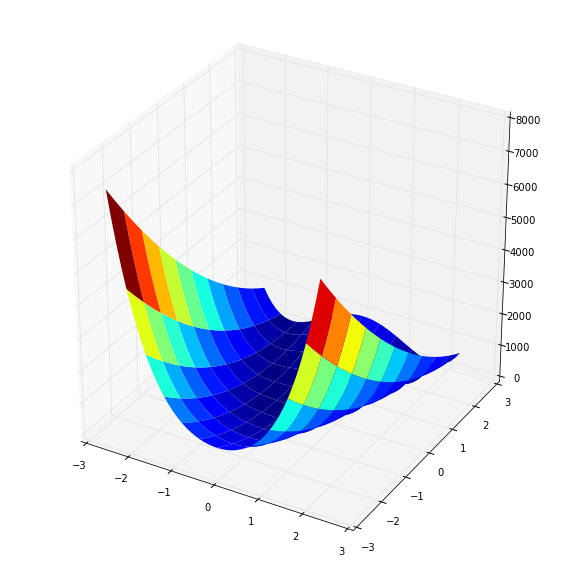

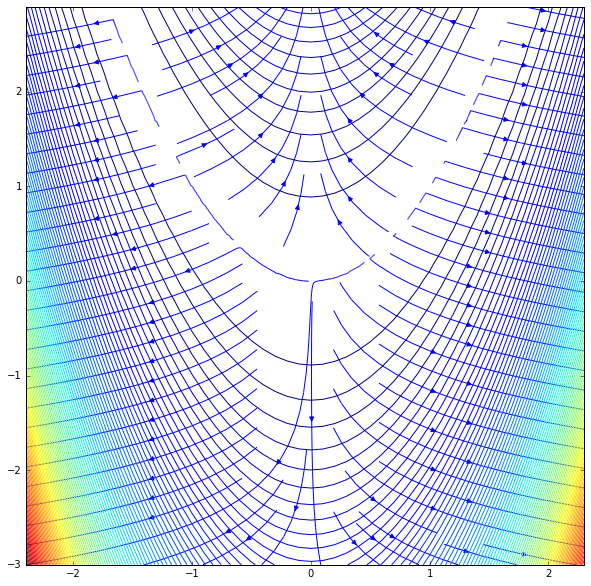

In [15]:
#Rosenbrok function setup and pot
#Define a function returning the value of f evaluated at the argument
def func(X,Y):
    return  (1-X)**2 +100*(Y-X**2)**2

#Define two functions that calculate the two first partial derivatives
def dx(X,Y): 
    return 2*(X-1) + 400*X*(X**2-Y)

def dy(X,Y):
    return 200*(Y-X**2)

#define a function that gives the off-diagonal terms of the Hessian Matrix (they are equal, Schwar'z theorem)
def dxdy(X,Y):
    return -400*X


#Define two functions that calculate the pure second derivative with respect to x
def seconddx(X,Y): 
    return 2-400*Y+1200*X**2

#calculate the pure second der with respect to y
def seconddy(X,Y):
    return 200
X = np.arange(-2.4, 2.4, 0.1)
Y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(X, Y)



%pylab inline

Z = func(X,Y) #evalute the function at each point of the grid

# Surface plot 3D 
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=6, cstride=4,  cmap=cm.jet,
                linewidth=0, antialiased=True)


plt.show()


plt.figure(figsize=(10,10))
plt.streamplot(X, Y, dx(X,Y), dy(X,Y))
plt.contour(X,Y,Z,100)

The function is also called "banana function" for its curved contours.
The  minimum is at (1, 1) and is found in a long, narrow, parabolic valley. It is easy to find the valley, but the convergence to the minimum is very slow. Indeed, this function is commonly used as a test for optimization algorithm.

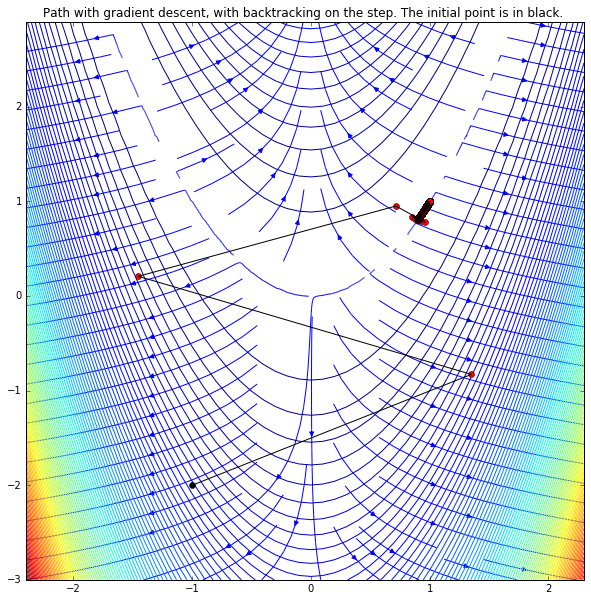

The coordinate of the reached point are ( 0.999992190279 ; 0.999984333731 ).
Steps done: 11200
Attempts: 111269


In [16]:
descent(-1,-2)

We see that after easily reaching the valley, the gradient descent algorithm takes more than 11 000 stepes (and 10x more attempts) to find the minimum (1,1). The descent in the valley is extremely slow.

[[2002  400]
 [ 400  200]]


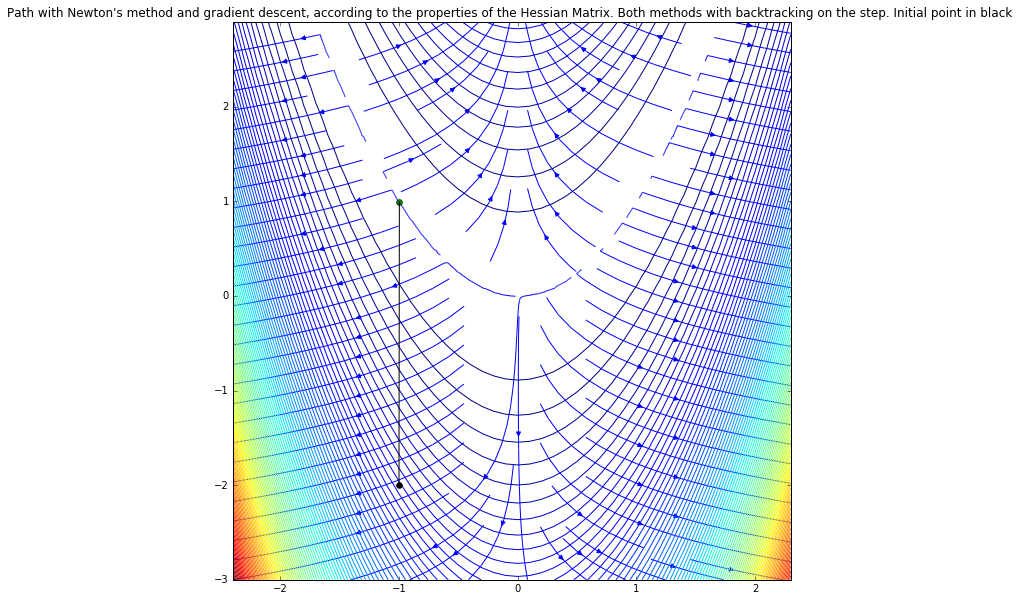

Steps done following gradient descent: 0
Attempts done by the  gradient descent method: 0
Steps done following Newton's method: 1
Attempts done by Newton's method: 1


In [17]:
Newtonupgrad(-1,-2)

The improvment is here considerable, only 20 steps instead of 11 000. Moroeover, for this function and this stating point, the gradient descent is never used. We started from a point where the function is convex and in the valley Newton's method performs well.

[[-946.  -40.]
 [ -40.  200.]]


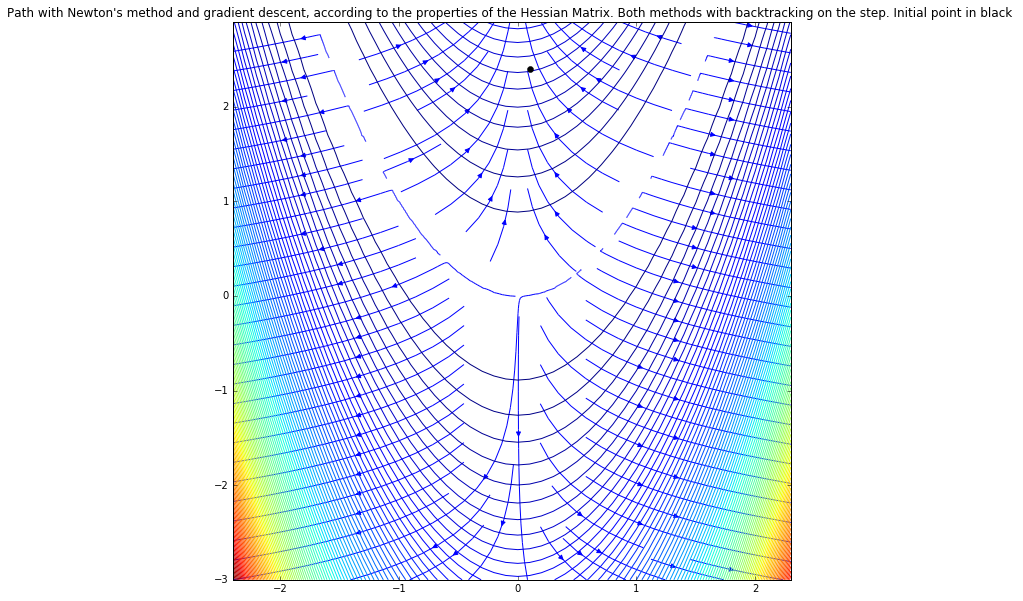

Steps done following gradient descent: 0
Attempts done by the  gradient descent method: 1
Steps done following Newton's method: 0
Attempts done by Newton's method: 1


In [18]:
Newtonupgrad(0.1,2.4)

Here, we start from a point in which the function is not convex. However, after a first step using the gradient descent, Newton's method suffices.